In [1]:
# Example how to use the Fourier Class

import numpy as np
import gm2
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.12/04


/cvmfs/gm2.opensciencegrid.org/prod/external/root/v6_12_04e/Linux64bit+2.6-2.12-e15-prof/lib/ROOT.py:318: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return _orig_ihook( name, *args, **kwds )


In [4]:
run = 3997
tr = gm2.Trolley([run])
_, tr_phi, tr_freq = tr.getBasics()

# Settings
probe = 0
N = 500
skip = 10# 6 # Skipt the first 6 measuerements

fr = gm2.Fourier(tr_phi[skip:, probe], tr_freq[skip:, probe], N)
fr_freq = fr.B(tr_phi[skip:, probe]) # Evaluate the B_fourier at the original position



Reading event 8730/8737 99.92% 
loop done: 100%                                    


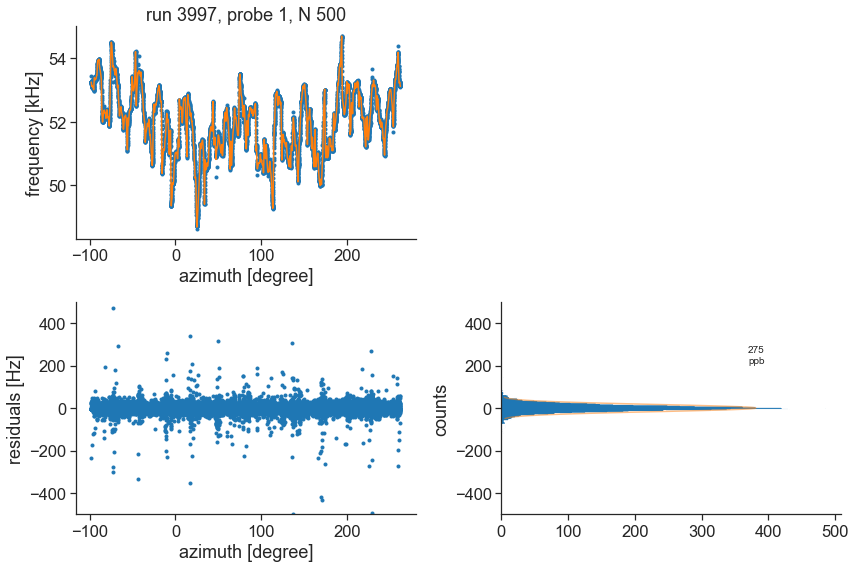

In [3]:
# Plot Overview
ylim = 500
figsize = [plt.rcParams['figure.figsize'][0] * 2.0, plt.rcParams['figure.figsize'][1] * 2.0]
fig = plt.figure(figsize=figsize)
ax0_0 = plt.subplot2grid((2,2), (0, 0))
ax1_0 = plt.subplot2grid((2,2), (1, 0), sharex=ax0_0)
ax1_1 = plt.subplot2grid((2,2), (1, 1), sharey=ax1_0)

ax0_0.set_title("run "+str(run)+", probe "+str(probe + 1)+", N "+str(N))

ax0_0.plot(tr_phi[skip:, probe]/np.pi*180., tr_freq[skip:, probe]/1e3, '.') # data points
ax0_0.plot(tr_phi[skip:, probe]/np.pi*180., fr_freq/1e3, '-') # fit
ax0_0.set_xlabel("azimuth [degree]")
ax0_0.set_ylabel("frequency [kHz]")

ax1_0.plot(tr_phi[skip:, probe]/np.pi*180., fr_freq - tr_freq[skip:, probe], '.')
ax1_0.set_xlabel("azimuth [degree]")
ax1_0.set_ylabel("residuals [Hz]")
ax1_0.set_ylim([-ylim, ylim])

gm2.plotutil.histWithGauss(ax1_1, (fr_freq - tr_freq[skip:, probe]), bins=np.arange(-ylim, ylim, 2))
#ax1_1.semilogx()
ax1_1.set_ylim(ax1_0.get_ylim())
ax1_1.set_ylabel("counts")

gm2.despine()
plt.show()
